# Step 1: Pull the data from the API

In [7]:
# import the libraries
import pandas as pd
import requests
import json
from config import headers
import numpy as np
import matplotlib as plt
import seaborn as sns

In [531]:
# Read the data from the csv file and print it out
df = pd.read_csv('Resources/cleaned_data.csv')
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",$9.96,USD,4.9,122,1,$9.96,False,False,True,False,10K+ bought in past month,"FREE delivery Mon, Jun 17 on $35 of items ship..."
1,1,B096SRYXMP,Beats Studio Buds - True Wireless Noise Cancel...,$79.99,USD,4.3,89505,1,$79.99,False,False,True,False,7K+ bought in past month,"FREE delivery Mon, Jun 17"
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,$129.95,USD,4.2,120,1,$129.95,False,False,True,False,5K+ bought in past month,"FREE delivery Mon, Jun 17"
3,3,B0CZ3TD6J2,"Retractable Car Charger, 4 in 1 Fast Charging ...",$23.99,USD,4.5,526,1,$23.99,False,False,True,False,300+ bought in past month,"FREE delivery Mon, Jun 17 on $35 of items ship..."
4,4,B0D17QS2W5,"Bluetooth Speakers, Portable Speakers Bluetoot...",$29.99,USD,4.6,342,1,$29.99,False,False,True,False,3K+ bought in past month,"FREE delivery Mon, Jun 17 on $35 of items ship..."


We want to get the reviews from the a live data and we need the ASIN for each product review to get it. To do that we will get the ASIN from the products dataframe and store it into a list and then run a function to get all the reviews for the products and store it into a json file

In [532]:
# Store the asin for each product into a variable and convert it into a list
df_asin = df['asin'].tolist()


In [533]:
# Define the function to get reviews based on asin
def get_reviews(asin):
    url = "https://real-time-amazon-data.p.rapidapi.com/search"

    querystring = {"asin":asin,"country":"US","sort_by":"TOP_REVIEWS","star_rating":"ALL","verified_purchases_only":"false","images_or_videos_only":"false","current_format_only":"false"}
    
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json()
    else:
        return None

In [534]:
# Function to get reviews based on ASIN
def get_reviews(asin):
    url = "https://real-time-amazon-data.p.rapidapi.com/product-reviews"
    querystring = {
        "asin": asin,
        "country": "US",
        "sort_by": "TOP_REVIEWS",
        "star_rating": "ALL",
        "verified_purchases_only": "false",
        "images_or_videos_only": "false",
        "current_format_only": "false"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    
    if response.status_code == 200:
        try:
            data = response.json()
            return data
        except json.JSONDecodeError:
            print(f"Error decoding JSON for ASIN {asin}")
            return None
    elif response.status_code == 404:
        print(f"Error 404 for ASIN {asin}")
        return None
    else:
        print(f"Error {response.status_code} for ASIN {asin}: {response.text}")
        return None


# Initialize a list to store the results
reviews_list = []

# Loop through the asin list and fetch reviews
for asin in df_asin:
    reviews = get_reviews(asin)
    if reviews:
        print(f"Fetched reviews for ASIN {asin}")
        reviews_list.append(reviews)
    else:
        print(f"No reviews found for ASIN {asin}")

# save the reviews to a JSON file
with open('Resources/reviews.json', 'w') as f:
    json.dump(reviews_list, f, indent=4)

Fetched reviews for ASIN B0D49CWPH2
Fetched reviews for ASIN B096SRYXMP
Fetched reviews for ASIN B0CZPHPJLN
Fetched reviews for ASIN B0CZ3TD6J2
Fetched reviews for ASIN B0D17QS2W5
Fetched reviews for ASIN B0C58MS6HF
Fetched reviews for ASIN B097BRZJVQ
Fetched reviews for ASIN B0D14VTV6C
Fetched reviews for ASIN B0D12T4WZT
Fetched reviews for ASIN B099VMT8VZ
Fetched reviews for ASIN B0D14PZ16V
Fetched reviews for ASIN B0CXSTPWL5
Fetched reviews for ASIN B0CGDDXY11
Fetched reviews for ASIN B0D1Y3JLBV
Fetched reviews for ASIN B0C5MFHCLC
Fetched reviews for ASIN B0D4QHB4G1
Fetched reviews for ASIN B084Y3VVNG
Fetched reviews for ASIN B0D2NL9X6M
Fetched reviews for ASIN B0C8VKH1ZH
Fetched reviews for ASIN B0D2DK1384
Fetched reviews for ASIN B0D2DJV327
Fetched reviews for ASIN B0CZBQC8QK
Fetched reviews for ASIN B0CXT8RNJB
Fetched reviews for ASIN B0C3L93F2Q
Fetched reviews for ASIN B0D2H2XB78
Fetched reviews for ASIN B07D6LX9ZP
Fetched reviews for ASIN B0D295BJQP
Fetched reviews for ASIN B0D

### Convert the json file into a dataframe

In [8]:
# Load the JSON data from the file
with open('../Resources/reviews.json', 'r') as f:
    reviews_data = json.load(f)

# Initialize an empty list to store all reviews
all_reviews = []

# Extract reviews for each unique ASIN
for entry in reviews_data:
    asin_data = entry.get('data', {})
    asin = asin_data.get('asin')
    reviews_list = asin_data.get('reviews', [])
    for review in reviews_list:
        review['asin'] = asin  # Add the ASIN to each review
        all_reviews.append(review)

# Convert the list of reviews to a DataFrame
reviews_df = pd.DataFrame(all_reviews)
reviews_df.reset_index(inplace=True)
# Display the DataFrame
reviews_df.head()


,index,review_id,review_title,review_comment,review_star_rating,review_link,review_author,review_author_avatar,review_images,review_video,review_date,is_verified_purchase,reviewed_product_asin,asin,helpful_vote_statement
0,0,RS1Z754NPU9RO,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,https://www.amazon.com/gp/customer-reviews/RS1...,DWS,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 8, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
1,1,R2J932BDC7P4WW,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,https://www.amazon.com/gp/customer-reviews/R2J...,junji yokota,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on June 5, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
2,2,R1DZH09ZCC4E0J,Excellent quality!,I got the cables yesterday and immediately put...,5,https://www.amazon.com/gp/customer-reviews/R1D...,Jack C.,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/71BsA-giC...,None,"Reviewed in the United States on May 30, 2024",True,B0D49CWPH2,B0D49CWPH2,One person found this helpful
3,3,R2J65OW79GGAGT,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,https://www.amazon.com/gp/customer-reviews/R2J...,Kathy Chhim,https://images-na.ssl-images-amazon.com/images...,[],None,"Reviewed in the United States on May 27, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN
4,4,R23X2QRTWBE5ZH,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,https://www.amazon.com/gp/customer-reviews/R23...,LS,https://images-na.ssl-images-amazon.com/images...,[https://m.media-amazon.com/images/I/61uX0Xc1T...,None,"Reviewed in the United States on June 1, 2024",True,B0D49CWPH2,B0D49CWPH2,NaN


# Quick EDA

In [9]:
reviews_df.shape

(3118, 15)

<Axes: title={'center': 'Count of Reviews By Stars'}, xlabel='review_star_rating'>

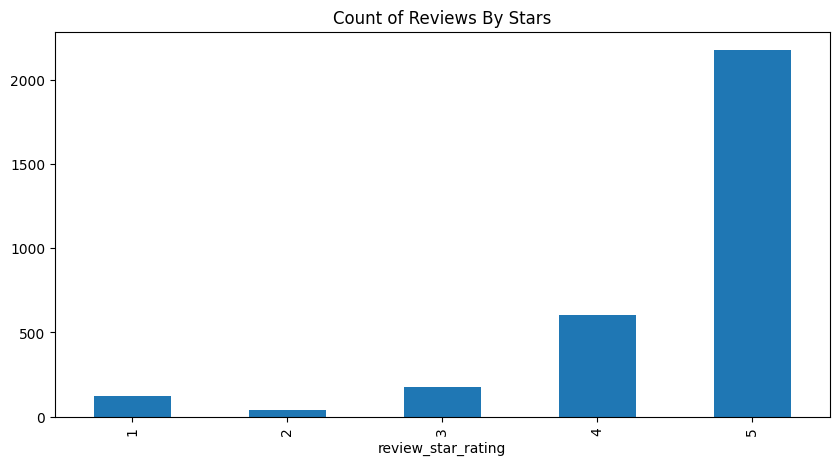

In [10]:
reviews_df['review_star_rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews By Stars', figsize=(10,5))

# Cleaning

In [11]:
# Drop unwanted columns
columns_drop = ['review_id', 'review_link', 'review_author','review_author_avatar', 'review_images', 'review_video', 'review_date', 'is_verified_purchase', 'reviewed_product_asin', 'helpful_vote_statement']
reviews_df = reviews_df.drop(columns=columns_drop)
reviews_df.head()


,index,review_title,review_comment,review_star_rating,asin
0,0,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,B0D49CWPH2
1,1,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,B0D49CWPH2
2,2,Excellent quality!,I got the cables yesterday and immediately put...,5,B0D49CWPH2
3,3,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,B0D49CWPH2
4,4,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,B0D49CWPH2


In [12]:
# Count the number of null vlues and drop and na values
reviews_df.dropna(inplace=True)
reviews_df.isnull().sum()


index                 0
review_title          0
review_comment        0
review_star_rating    0
asin                  0
dtype: int64

# Step 2: NLP

# NLP using NLTK 

In [13]:
# Import the libraries
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [14]:
# nltk.download('vader_lexicon')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [15]:
reviews_df.head()

,index,review_title,review_comment,review_star_rating,asin
0,0,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,B0D49CWPH2
1,1,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,B0D49CWPH2
2,2,Excellent quality!,I got the cables yesterday and immediately put...,5,B0D49CWPH2
3,3,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,B0D49CWPH2
4,4,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,B0D49CWPH2


In [16]:
# get the first value and store to test it as an example
example = reviews_df['review_comment'].values[1]
example

"The USB C to USB C Cable 5-Pack (6FT) is a reliable and versatile charging solution, especially for my iPhone 15. Each cable is 6 feet long, providing ample reach for various charging scenarios. The cables support 60W (3A) power delivery, ensuring fast and efficient charging. The durable nylon braiding enhances longevity, making these cables resistant to wear and tear. With five cables in the pack, this is an excellent value, offering multiple options for home, office, or travel use. Overall, it's a dependable and cost-effective choice for anyone needing high-performance USB C charging cables."

In [17]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The', 'USB', 'C', 'to', 'USB', 'C', 'Cable', '5-Pack', '(', '6FT']

# VADER Sentiment Scoring
We will use NLTK's SentimentalIntensityAnalyer to get the neg/neu/pos score of the reviews
- We'll remove the stop words


Example for SentimentIntensityAnalyzer() to check if it works using polarity_score

In [18]:
sia.polarity_scores("I AM SO HAPPY")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores("Today is a bad day")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [20]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.9337}

In [21]:
#Import stop words from the NLTK library and create a set
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /Users/amer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Remove the stop words from the comment_review columns
reviews_df['comments_no_stopwords'] = reviews_df['review_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [23]:
# Run the polarity score on the entire set
res = {}
for i, row in tqdm(reviews_df.iterrows(), total=len(reviews_df)):
    text = row['comments_no_stopwords']
    id = row['index']
    res[id] = sia.polarity_scores(text)


  0%|          | 0/3114 [00:00<?, ?it/s]

In [24]:
res

{0: {'neg': 0.034, 'neu': 0.633, 'pos': 0.333, 'compound': 0.9645},
 1: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.9337},
 2: {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.9562},
 3: {'neg': 0.041, 'neu': 0.763, 'pos': 0.196, 'compound': 0.8363},
 4: {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9482},
 5: {'neg': 0.085, 'neu': 0.712, 'pos': 0.204, 'compound': 0.7712},
 6: {'neg': 0.081, 'neu': 0.757, 'pos': 0.162, 'compound': 0.4588},
 7: {'neg': 0.0, 'neu': 0.716, 'pos': 0.284, 'compound': 0.9059},
 8: {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4404},
 9: {'neg': 0.088, 'neu': 0.596, 'pos': 0.316, 'compound': 0.9017},
 10: {'neg': 0.072, 'neu': 0.559, 'pos': 0.368, 'compound': 0.8402},
 11: {'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.9661},
 12: {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.9136},
 13: {'neg': 0.082, 'neu': 0.528, 'pos': 0.39, 'compound': 0.9165},
 14: {'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'compound': -

In [25]:
# convert the result into dataframe and merge it with the original dataframe
sentiment_df = pd.DataFrame.from_dict(res, orient='index')
# Merge sentiment_df with the original dataframe reviews_df on the reviewed_product_asin column
merged_df = pd.merge(reviews_df, sentiment_df, how='left', left_on='index', right_index=True)
merged_df.head()

,index,review_title,review_comment,review_star_rating,asin,comments_no_stopwords,neg,neu,pos,compound
0,0,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,B0D49CWPH2,This pack usb-c usb-c cables perfectly service...,0.034,0.633,0.333,0.9645
1,1,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,B0D49CWPH2,The USB C USB C Cable 5-Pack (6FT) reliable ve...,0.000,0.781,0.219,0.9337
2,2,Excellent quality!,I got the cables yesterday and immediately put...,5,B0D49CWPH2,I got cables yesterday immediately put work. S...,0.000,0.722,0.278,0.9562
3,3,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,B0D49CWPH2,"So cheap charges fast. I got charge laptop, ip...",0.041,0.763,0.196,0.8363
4,4,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,B0D49CWPH2,Extremely pleased high quality charging cables...,0.000,0.659,0.341,0.9482


In [26]:
merged_df.shape

(3114, 10)

In [27]:
# create a label to set the data for ML model training based on compound column
def categorize_value(x):
    if x > 0:
        return 1
    elif x < 0:
        return 0
    

# Applying the function to the 'compound' column
merged_df['sentiment'] = merged_df['compound'].apply(categorize_value)
# drop any null values 
merged_df.dropna(inplace=True)
# Convert sentiment into int
merged_df['sentiment'] = merged_df['sentiment'].astype(int)
merged_df.reset_index(inplace=True)
# Displaying the DataFrame
merged_df.head()

,level_0,index,review_title,review_comment,review_star_rating,asin,comments_no_stopwords,neg,neu,pos,compound,sentiment
0,0,0,Charges my bike computer very well.,This pack of usb-c to usb-c cables is perfectl...,5,B0D49CWPH2,This pack usb-c usb-c cables perfectly service...,0.034,0.633,0.333,0.9645,1
1,1,1,"Dependable, high-performance, longevity",The USB C to USB C Cable 5-Pack (6FT) is a rel...,5,B0D49CWPH2,The USB C USB C Cable 5-Pack (6FT) reliable ve...,0.000,0.781,0.219,0.9337,1
2,2,2,Excellent quality!,I got the cables yesterday and immediately put...,5,B0D49CWPH2,I got cables yesterday immediately put work. S...,0.000,0.722,0.278,0.9562,1
3,3,3,CHARGES SO FAST,So cheap and charges so fast. I got these to c...,5,B0D49CWPH2,"So cheap charges fast. I got charge laptop, ip...",0.041,0.763,0.196,0.8363,1
4,4,4,Great Quality Charging Cables!!,Extremely pleased with the high quality of the...,5,B0D49CWPH2,Extremely pleased high quality charging cables...,0.000,0.659,0.341,0.9482,1


In [28]:
merged_df['sentiment'].value_counts()

sentiment
1    2631
0     248
Name: count, dtype: int64

In [30]:
merged_df.to_csv('../Resources/nlp_model_data.csv')